In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
#dropping irrelavent columns
#To specify the columns we use axis=1
#To make changes permanent we use inplace=True
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [5]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [7]:
df.shape

(200000, 7)

In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df['pickup_datetime'] 

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 200000, dtype: object

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) #To separate the time and date

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
 7   year               200000 non-null  int64              
 8   month              200000 non-null  int64              
 9   weekday            200000 non-null  int64              
 10  hour               200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(5)
memory usage: 16.8 MB


In [12]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [13]:
df['hour'].value_counts()

19    12605
18    12072
20    11755
21    11446
22    11023
13    10024
12     9924
23     9805
17     9758
14     9749
15     9614
11     9422
9      9339
8      9075
10     8944
16     8313
0      7844
7      7231
1      5908
2      4422
6      4139
3      3256
4      2365
5      1967
Name: hour, dtype: int64

In [14]:
df['hour'].unique()

array([19, 20, 21,  8, 17,  2,  7, 13,  9, 22, 14, 11, 23,  0, 16,  6, 15,
        5, 10, 18,  3,  1,  4, 12], dtype=int64)

In [15]:
#pd.cut() function is used here to create new columns 
df['Monthly_Quarter'] = pd.cut(df['month'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

df['Hourly_Segments'] = pd.cut(df['hour'], bins=[0, 3, 7, 11, 15, 19, 23], labels=['H1', 'H2', 'H3', 'H4', 'H5', 'H6'], include_lowest = True)

In [16]:
#segmenting the latitude and longitude values in the appropriate range

df=df.query('(pickup_latitude < 90) & (dropoff_latitude < 90) & \
            (pickup_latitude > -90) & (dropoff_latitude > -90) & \
            (pickup_longitude < 180) & (dropoff_longitude < 180) & \
            (pickup_longitude > -180) & (dropoff_longitude > -180)')

In [17]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [18]:
#Calculating the distance between pickup and dropoff

#Geopy library helps us to find the distance between longitude and latitude and it is connected and has plugins to the world graphics
import geopy.distance 

In [19]:
df['Distance'] = [round(geopy.distance.distance(
                    (df.pickup_latitude[i], 
                      df.pickup_longitude[i]), 
                       (df.dropoff_latitude[i], 
                         df.dropoff_longitude[i])).km,2) #Getting the distance in kilometers and with 2 decimal point
                 for i in df.index] #Storing the calculated data in the column

In [20]:
df.drop(['pickup_datetime', 'month', 'hour', 'Monthly_Quarter'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,H5,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,H6,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,H6,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,H3,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,H5,4.48


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199987 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   fare_amount        199987 non-null  float64 
 1   pickup_longitude   199987 non-null  float64 
 2   pickup_latitude    199987 non-null  float64 
 3   dropoff_longitude  199987 non-null  float64 
 4   dropoff_latitude   199987 non-null  float64 
 5   passenger_count    199987 non-null  int64   
 6   year               199987 non-null  int64   
 7   weekday            199987 non-null  int64   
 8   Hourly_Segments    199987 non-null  category
 9   Distance           199987 non-null  float64 
dtypes: category(1), float64(6), int64(3)
memory usage: 19.5 MB


In [22]:
#Changes rows to columns and columns to rows using transpose
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,199987.0,11.359849,9.901868,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199987.0,-72.501786,10.449955,-93.824668,-73.992064,-73.981822,-73.967154,40.808425
pickup_latitude,199987.0,39.917937,6.130412,-74.015515,40.734793,40.752592,40.767157,48.018760
dropoff_longitude,199987.0,-72.511608,10.412192,-75.458979,-73.991407,-73.980092,-73.963658,40.831932
dropoff_latitude,199987.0,39.922031,6.117669,-74.015750,40.733823,40.753042,40.768000,45.031598
passenger_count,199987.0,1.684544,1.385999,0.000000,1.000000,1.000000,2.000000,208.000000
year,199987.0,2011.742463,1.856438,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,199987.0,3.048383,1.946960,0.000000,1.000000,3.000000,5.000000,6.000000
Distance,199987.0,20.563460,379.663759,0.000000,1.220000,2.120000,3.870000,8783.590000


In [23]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

In [24]:
#Detecting the outlier
#Amount < -52: Any Observation with an amount less than -52 can be identified as an outlier
#Trips with travel distance less than or equal to 0 and more than 130 kilometers(130 is a random assumption)
#Trips with latitude values less than -90 or greater than 90, as well as longitude values less than -180 or greater than 180, can be identified as outliers.

In [25]:
df['fare_amount'].min()

-52.0

In [26]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median().to_dict())

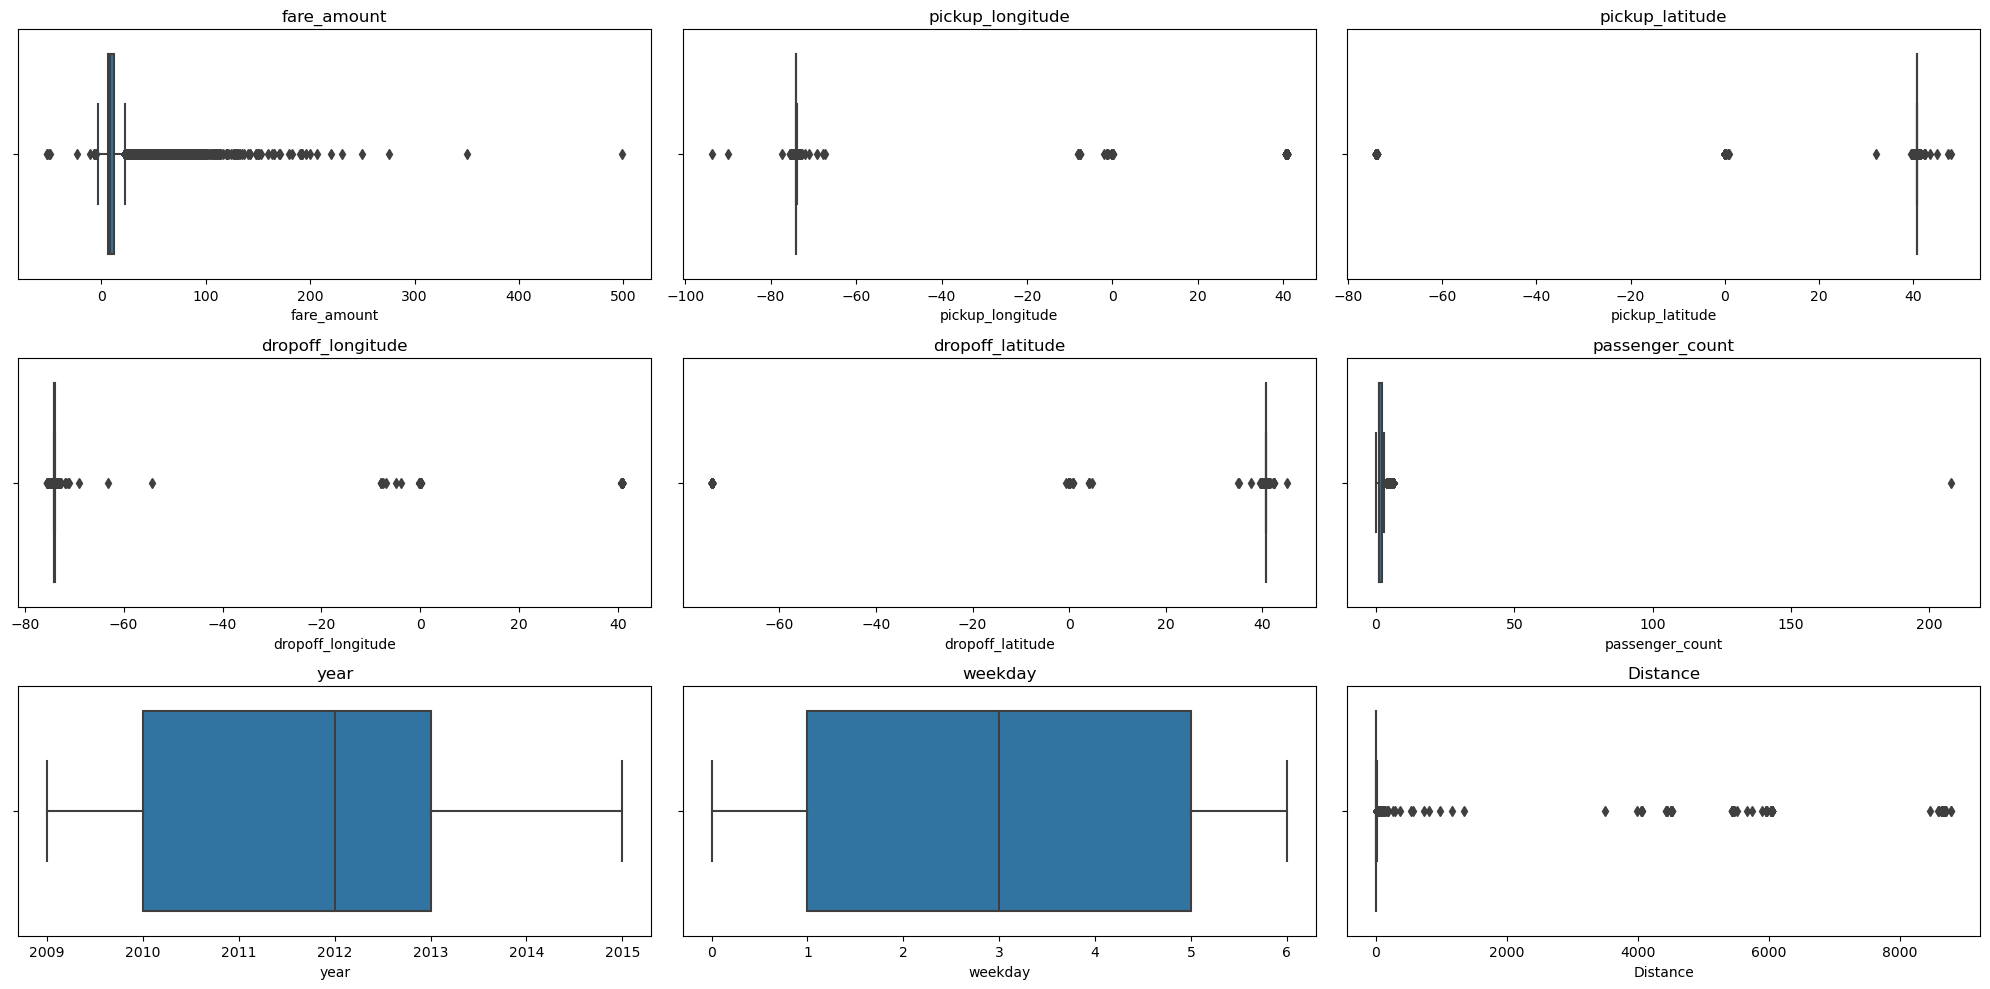

In [27]:
#Outlier dectection using boxplot
plt.figure(figsize=(20,10))

for i ,col in enumerate(numeric_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col], whis=1.5)
    plt.tight_layout()
    plt.title(col)
    
plt.show()

In [32]:
#Remove the outliers from the dataset
#Lower whisker=Lower bound and Upper whisker=Upper bound
def remove_outliers(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1


def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outliers(df, c)
    return df1

In [33]:
df = treat_outliers_all(df, numeric_columns)

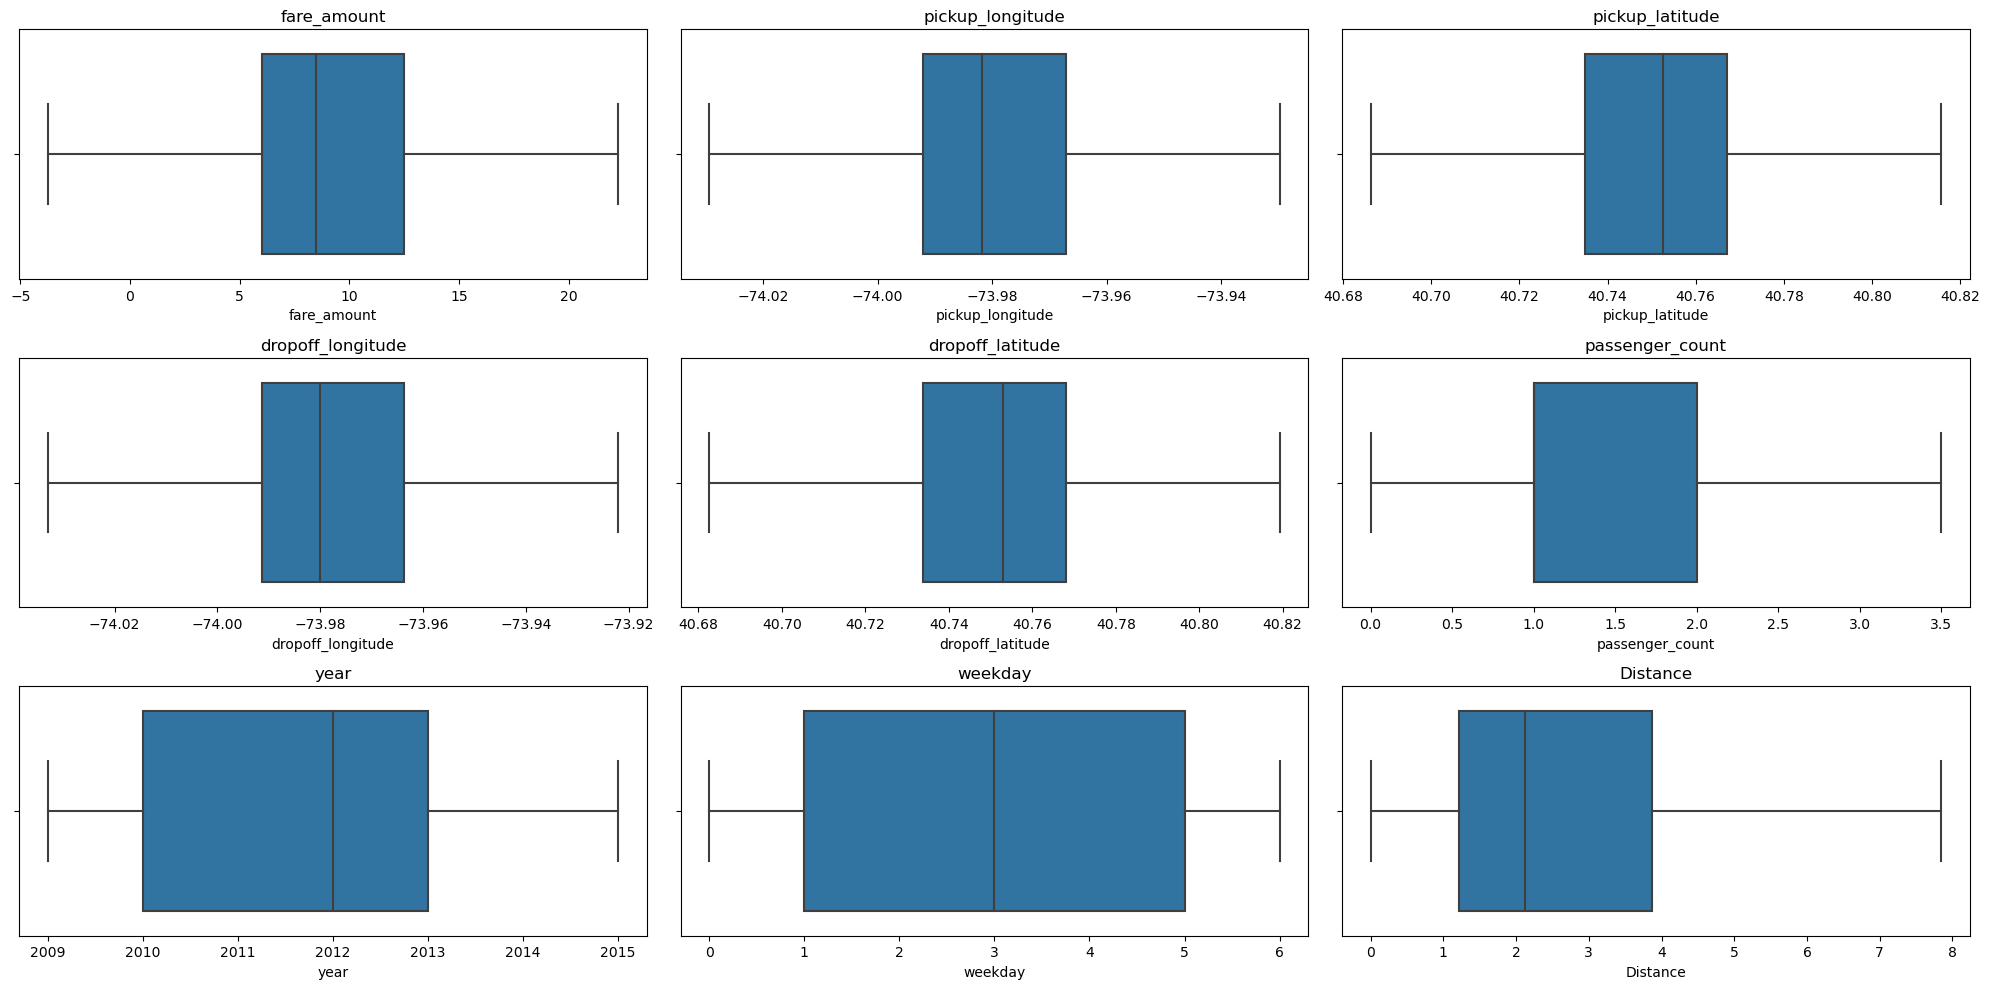

In [34]:
#Outlier dectection using boxplot
plt.figure(figsize=(20,10))

for i ,col in enumerate(numeric_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col], whis=1.5)
    plt.tight_layout()
    plt.title(col)
    
plt.show()

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,199987.0,10.080998,5.440187,-3.750000,6.000000,8.500000,12.500000,22.250000
pickup_longitude,199987.0,-73.978309,0.020505,-74.029429,-73.992064,-73.981822,-73.967154,-73.929789
pickup_latitude,199987.0,40.750194,0.025658,40.686248,40.734793,40.752592,40.767157,40.815702
dropoff_longitude,199987.0,-73.976192,0.022879,-74.033030,-73.991407,-73.980092,-73.963658,-73.922034
dropoff_latitude,199987.0,40.750151,0.028659,40.682558,40.733823,40.753042,40.768000,40.819266
passenger_count,199987.0,1.514376,0.876714,0.000000,1.000000,1.000000,2.000000,3.500000
year,199987.0,2011.742463,1.856438,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,199987.0,3.048383,1.946960,0.000000,1.000000,3.000000,5.000000,6.000000
Distance,199987.0,2.852147,2.219375,0.000000,1.220000,2.120000,3.870000,7.845000


In [36]:
df = df.loc[(df.fare_amount > 0)]

In [37]:
df = df.loc[(df.Distance > 0)]

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,193971.0,10.095386,5.422990,0.010000,6.000000,8.500000,12.500000,22.250000
pickup_longitude,193971.0,-73.979308,0.019448,-74.029429,-73.992268,-73.982117,-73.968422,-73.929789
pickup_latitude,193971.0,40.751392,0.024245,40.686248,40.736368,40.753260,40.767513,40.815702
dropoff_longitude,193971.0,-73.977284,0.021725,-74.033030,-73.991587,-73.980542,-73.965453,-73.922034
dropoff_latitude,193971.0,40.751418,0.027312,40.682558,40.735241,40.753715,40.768318,40.819266
passenger_count,193971.0,1.514979,0.876954,0.000000,1.000000,1.000000,2.000000,3.500000
year,193971.0,2011.747921,1.859722,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,193971.0,3.048719,1.946754,0.000000,1.000000,3.000000,5.000000,6.000000
Distance,193971.0,2.940346,2.195024,0.010000,1.290000,2.190000,3.960000,7.845000


In [39]:
df.shape

(193971, 10)

In [40]:
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
fare_amount,1.000000,0.168744,-0.119346,0.238466,-0.134819,0.017295,0.142253,0.013270,0.879837
pickup_longitude,0.168744,1.000000,0.417859,0.342570,0.195939,-0.013358,0.013130,-0.026187,0.176578
pickup_latitude,-0.119346,0.417859,1.000000,0.175794,0.446075,-0.015487,-0.014102,-0.045406,-0.117764
dropoff_longitude,0.238466,0.342570,0.175794,1.000000,0.392589,-0.009124,0.013989,-0.003155,0.272251
dropoff_latitude,-0.134819,0.195939,0.446075,0.392589,1.000000,-0.008223,-0.008979,-0.033840,-0.104459
passenger_count,0.017295,-0.013358,-0.015487,-0.009124,-0.008223,1.000000,-0.009403,0.049121,0.009090
year,0.142253,0.013130,-0.014102,0.013989,-0.008979,-0.009403,1.000000,0.006024,0.021336
weekday,0.013270,-0.026187,-0.045406,-0.003155,-0.033840,0.049121,0.006024,1.000000,0.027966
Distance,0.879837,0.176578,-0.117764,0.272251,-0.104459,0.009090,0.021336,0.027966,1.000000


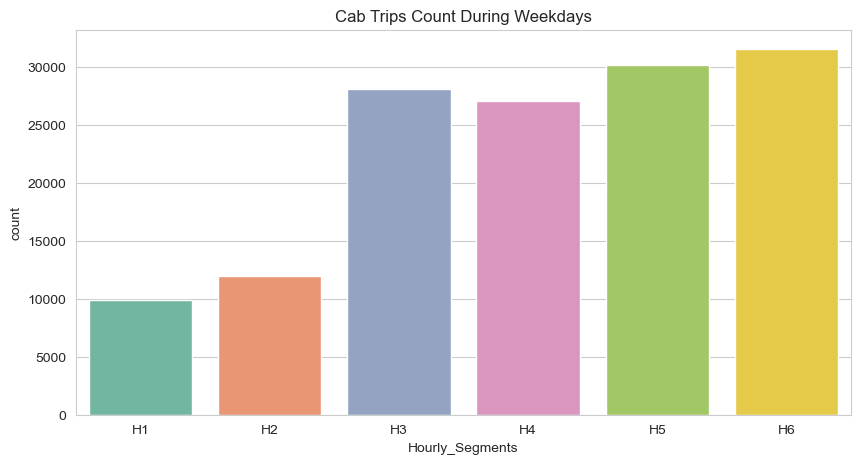

In [41]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_palette("Set2")

plt.title('Cab Trips Count During Weekdays')

sns.countplot(x='Hourly_Segments', data=df.loc[(df.weekday >= 0 ) & (df.weekday <= 4)])

plt.show()

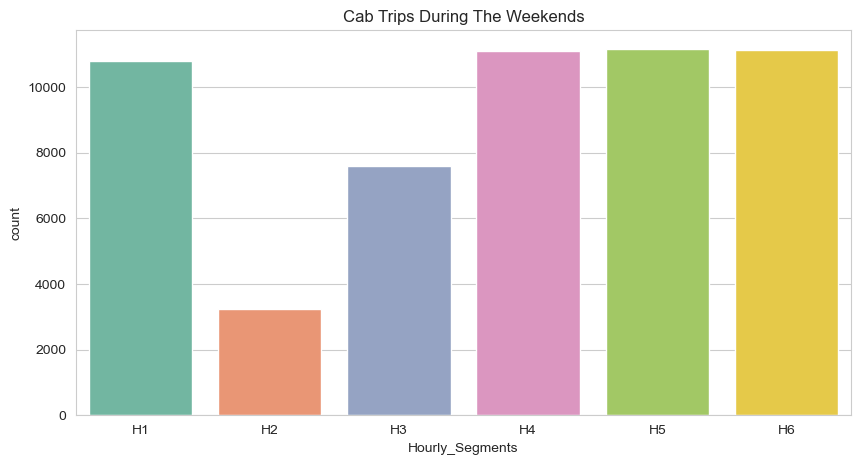

In [42]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.set_palette('Set2')

plt.title('Cab Trips During The Weekends')

sns.countplot(x='Hourly_Segments', data=df.loc[(df.weekday >= 5) & (df.weekday <= 6)])

plt.show()

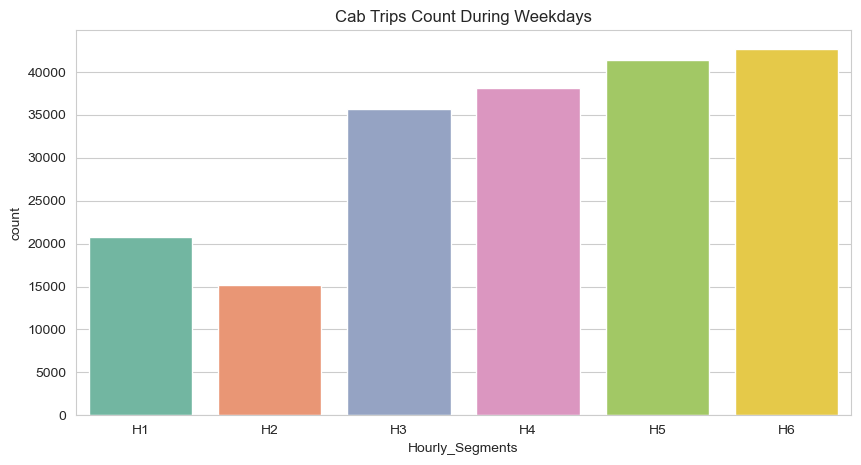

In [43]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_palette("Set2")

plt.title('Cab Trips Count During Weekdays')

sns.countplot(x='Hourly_Segments', data=df.loc[(df.weekday >= 0 ) & (df.weekday <= 6)])

plt.show()

In [44]:
week_days = df.loc[(df.weekday >= 0) & (df.weekday <= 4)]
week_ends = df.loc[(df.weekday >= 5) & (df.weekday <= 6)]

week_days_fare = week_days.groupby('Hourly_Segments')['fare_amount'].mean().reset_index()
week_ends_fare = week_ends.groupby('Hourly_Segments')['fare_amount'].mean().reset_index()

In [45]:
week_days_fare

,Hourly_Segments,fare_amount
0,H1,10.660578
1,H2,10.100999
2,H3,9.975095
3,H4,10.147620
4,H5,9.877003
5,H6,10.126527


In [46]:
week_ends_fare

,Hourly_Segments,fare_amount
0,H1,10.533564
1,H2,11.369094
2,H3,9.514333
3,H4,9.969476
4,H5,9.996106
5,H6,10.089233


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


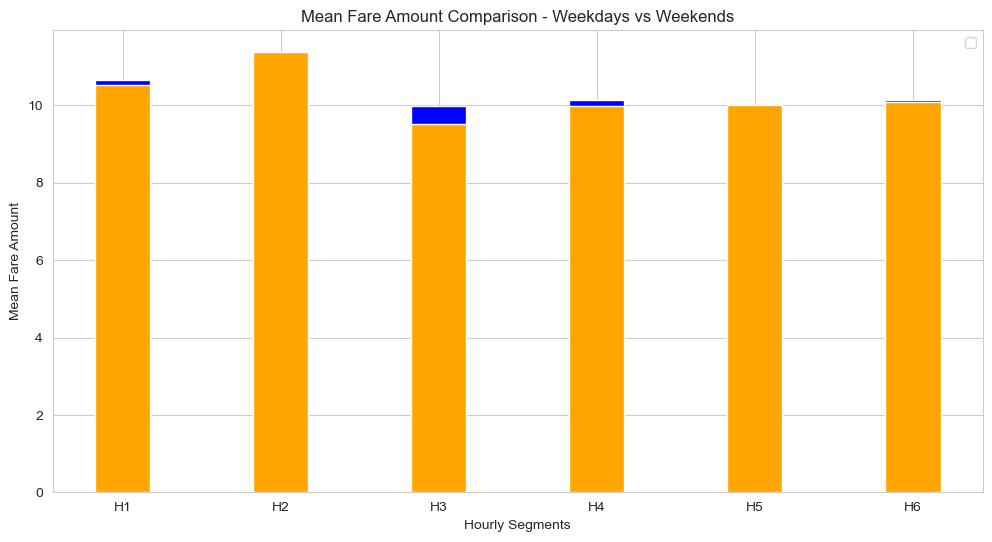

In [47]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.title('Mean Fare Amount Comparison - Weekdays vs Weekends')
bar_width = 0.35

#Bar Plot
plt.bar(week_days_fare['Hourly_Segments'], week_days_fare['fare_amount'], width = bar_width, color='blue')

plt.bar(week_ends_fare['Hourly_Segments'], week_ends_fare['fare_amount'], width = bar_width, color='orange')

plt.xlabel('Hourly Segments')
plt.ylabel('Mean Fare Amount')

plt.legend()
plt.show()

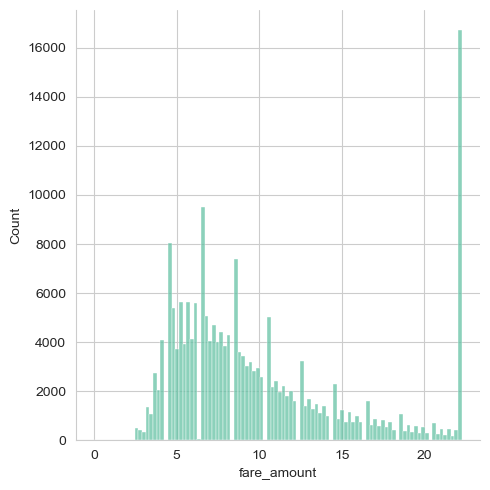

In [48]:
sns.displot(df['fare_amount'])

In [49]:
df['fare_amount'].mean()

10.095385753540556

In [50]:
df['fare_amount'].median()

8.5

In [52]:
df['fare_amount'].mode()

0    22.25
Name: fare_amount, dtype: float64

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Hourly_Segments'] = le.fit_transform(df['Hourly_Segments'])

In [54]:
df['Hourly_Segments'].value_counts()

5    42711
4    41380
3    38183
2    35717
0    20763
1    15217
Name: Hourly_Segments, dtype: int64

In [55]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,4,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,4,5,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,0,5,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,4,2,1.66
4,16.0,-73.929789,40.744085,-73.973082,40.761247,3.5,2014,3,4,4.48


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
X = df.drop('fare_amount', axis=1) #independent variable
y = df['fare_amount'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
#Creating and training the linear regression model
model = LinearRegression() #initializing the object for linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [59]:
#Predicting fare amounts on the test set
y_pred = model.predict(X_test)
y_pred

array([ 8.61395127,  6.14190814, 10.90112464, ...,  6.72912516,
       12.55177873,  9.04386645])

In [60]:
r2 = r2_score(y_test, y_pred)
r2

0.7950740607584375

In [61]:
mse = mean_squared_error(y_test, y_pred)
mse

6.05020879411102

In [63]:
def predict_fare(user_inputs):
    input_values = [user_inputs['pickup_longitude'], user_inputs['pickup_latitude'],
                    user_inputs['dropoff_longitude'], user_inputs['dropoff_latitude'],
                    user_inputs['passenger_count'], user_inputs['year'],
                    user_inputs['weekday'], user_inputs['Hourly_Segments'],
                    user_inputs['Distance']]
    
    fare_prediction = model.predict([input_values])[0]
    return fare_prediction

In [64]:
user_inputs = {
    'pickup_longitude': -73.9821,
    'pickup_latitude': 40.7488,
    'dropoff_longitude': -73.9853,
    'dropoff_latitude': 40.7550,
    'passenger_count': 5,
    'year': 2023,
    'weekday': 3,
    'Hourly_Segments': 10,
    'Distance':2.55
}

predicted_fare = predict_fare(user_inputs)

C:\Users\Jasmine Ansari\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
print('Predicted Fare Amount: ', predicted_fare)

Predicted Fare Amount:  13.779182168179602


# Optimization
1. Feature Engineering
2. Feature Selection
3. Feature Scaling
4. Gradient Descent
5. Hyperparameter tuning